## Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import math
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import linear_model
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import normalize

In [2]:
Forcast=pd.read_csv('/Users/Asus/Documents/InternCsv/Forcast_Official.csv')

In [3]:
#Renaming the Unnamed Column into Plants and creating and Index
Forcast = Forcast.rename(columns={'Unnamed: 0': 'Plants'})

In [4]:
Forcast.drop('Plants',inplace=True,axis=1)

In [5]:
Forcast.drop('Date',inplace=True,axis=1)

In [6]:
Plant_Forcast=Forcast.groupby(["Plant"])

In [7]:
Plant_Sum=Plant_Forcast.sum()

In [8]:
Plant_Sum["Total_Dispatch"] = Plant_Sum.sum(axis=1)

In [9]:
Plant_Sum.head(5)

,00:00,00:30,01:00,01:30,02:00,02:30,03:00,03:30,04:00,04:30,...,19:30,20:00,20:30,21:00,21:30,22:00,22:30,23:00,23:30,Total_Dispatch
Plant,,,,,,,,,,,,,,,,,,,,,
ACE EMBP,664.59440,491.6603,443.6441,455.0947,434.8058,402.7511,367.7511,349.7511,418.422,497.9831,...,1989.0882,1999.0433,1986.4342,1925.7379,1916.2499,1872.5425,1764.61210,1491.7185,799.6197,73443.13790
ACE Matara,48.00000,24.0000,16.0000,24.0000,16.0000,16.0000,16.0000,16.0000,16.000,49.3920,...,483.7350,467.7350,467.7350,443.7350,435.7350,394.7160,314.91000,225.8470,184.0000,16064.01400
ALTAQQA-Mahi.,0.13437,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.000,0.0000,...,10.0000,10.0000,10.0000,10.0000,10.0000,0.0000,0.00000,0.0000,0.0000,330.13437
ALTAQQA-Pol.,8.00000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.000,0.0000,...,8.0000,8.0000,8.0000,8.0000,8.0000,0.0000,0.11088,0.0000,0.0000,272.11088
Asia Power,42.00000,42.0000,40.0620,42.0000,32.9000,32.9000,32.9000,32.9000,62.400,110.9000,...,742.5000,742.5000,733.1000,728.4000,724.5000,704.2223,628.30000,406.7665,352.2000,26953.03220


In [10]:
Plant_Sum.shape

(37, 49)

In [11]:
Plant_Sum.reset_index(level=0,inplace=True)

In [12]:
Plant_Sum.head(3)

,Plant,00:00,00:30,01:00,01:30,02:00,02:30,03:00,03:30,04:00,...,19:30,20:00,20:30,21:00,21:30,22:00,22:30,23:00,23:30,Total_Dispatch
0,ACE EMBP,664.59440,491.6603,443.6441,455.0947,434.8058,402.7511,367.7511,349.7511,418.422,...,1989.0882,1999.0433,1986.4342,1925.7379,1916.2499,1872.5425,1764.6121,1491.7185,799.6197,73443.13790
1,ACE Matara,48.00000,24.0000,16.0000,24.0000,16.0000,16.0000,16.0000,16.0000,16.000,...,483.7350,467.7350,467.7350,443.7350,435.7350,394.7160,314.9100,225.8470,184.0000,16064.01400
2,ALTAQQA-Mahi.,0.13437,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.000,...,10.0000,10.0000,10.0000,10.0000,10.0000,0.0000,0.0000,0.0000,0.0000,330.13437


## Data Vizualization

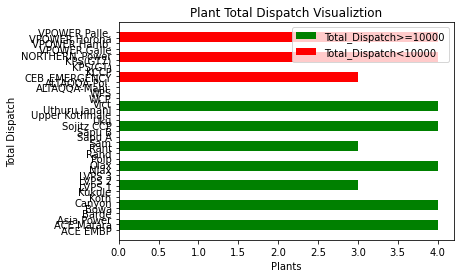

In [13]:
High_Dispatch = Plant_Sum[Plant_Sum['Total_Dispatch']>=10000].Plant
Low_Dispatch = Plant_Sum[Plant_Sum['Total_Dispatch']<10000].Plant

plt.xlabel("Plants")
plt.ylabel("Total Dispatch")
plt.title("Plant Total Dispatch Visualiztion")


plt.hist([High_Dispatch, Low_Dispatch], rwidth=50.3,orientation='horizontal', color=['green','red'],label=['Total_Dispatch>=10000','Total_Dispatch<10000'])
plt.legend()

### Find Unique Values in Forcast

In [14]:
def print_unique_col_values(df):
       for column in df:
            if df[column].dtypes=='object':
                print(f'{column}: {df[column].unique()}')

In [15]:
print_unique_col_values(Plant_Sum)

Plant: ['ACE EMBP' 'ACE Matara' 'ALTAQQA-Mahi.' 'ALTAQQA-Pol.' 'Asia Power'
 'Barge' 'Bowa' 'CEB_EMERGENCY' 'Canyon' 'KCCP' 'KPS(GT)' 'KPS(GT7)'
 'Koth' 'Kukule' 'LVPS 1' 'LVPS 2' 'LVPS 3' 'NORTHERN_Power' 'Nlax' 'Olax'
 'Polp' 'Rand' 'Rant' 'Sam' 'Sapu A' 'Sapu B' 'Sojitz CCP' 'Uku'
 'Upper Kothmale' 'Uthuru Janani' 'VPOWER Galle' 'VPOWER Hamb.'
 'VPOWER Horona' 'VPOWER Palle.' 'Vict' 'WCP' 'WPS']


### Hot Encoding of Numerical Data

In [16]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
Plant_New = scaler.fit_transform(Plant_Sum.iloc[:,1:-1])

In [19]:
Plant_New

array([[9.11652126e-02, 6.74431139e-02, 6.08565295e-02, ...,
        2.42059273e-01, 2.04625309e-01, 1.09687202e-01],
       [6.58436214e-03, 3.29218107e-03, 2.19478738e-03, ...,
        4.31975309e-02, 3.09803841e-02, 2.52400549e-02],
       [1.84320988e-05, 0.00000000e+00, 0.00000000e+00, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       ...,
       [4.23227984e-02, 3.85275995e-02, 3.78175583e-02, ...,
        1.50823045e-02, 1.50823045e-02, 1.50823045e-02],
       [5.86852538e-01, 6.02578326e-01, 5.96569136e-01, ...,
        7.77777778e-01, 7.40740741e-01, 7.17832647e-01],
       [1.83344307e-02, 1.13799726e-02, 1.37174211e-03, ...,
        1.01916324e-02, 1.09739369e-02, 5.48696845e-03]])

In [20]:
Plant_New.shape

(37, 48)

In [37]:
X = Plant_New[1:,0:45]
y = Plant_New[1:,46:47].astype(np.float32)


In [38]:
X

array([[6.58436214e-03, 3.29218107e-03, 2.19478738e-03, ...,
        6.08689986e-02, 5.97716049e-02, 5.41448560e-02],
       [1.84320988e-05, 0.00000000e+00, 0.00000000e+00, ...,
        1.37174211e-03, 1.37174211e-03, 0.00000000e+00],
       [1.09739369e-03, 0.00000000e+00, 0.00000000e+00, ...,
        1.09739369e-03, 1.09739369e-03, 0.00000000e+00],
       ...,
       [4.23227984e-02, 3.85275995e-02, 3.78175583e-02, ...,
        8.00626886e-02, 6.49637860e-02, 2.50643347e-02],
       [5.86852538e-01, 6.02578326e-01, 5.96569136e-01, ...,
        7.96296296e-01, 7.95198903e-01, 7.77777778e-01],
       [1.83344307e-02, 1.13799726e-02, 1.37174211e-03, ...,
        6.01488340e-02, 3.46488340e-02, 2.41064472e-02]])

In [39]:
y


array([[0.03098038],
       [0.        ],
       [0.        ],
       [0.05579787],
       [0.21392319],
       [0.00856872],
       [0.        ],
       [0.03308861],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.0603203 ],
       [0.15341866],
       [1.        ],
       [1.        ],
       [1.        ],
       [0.        ],
       [0.08955501],
       [0.04544225],
       [0.10048836],
       [0.        ],
       [0.        ],
       [0.00140055],
       [0.1654321 ],
       [0.23470508],
       [0.06707819],
       [0.07078189],
       [0.09480315],
       [0.0582121 ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.0150823 ],
       [0.7407407 ],
       [0.01097394]], dtype=float32)

In [40]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=15)

In [42]:
X_train.shape

(28, 45)

In [43]:
y_train.shape

(28, 1)

In [46]:
# Create the dataframe
df = pd.DataFrame(X_train,columns = ['00:00','00:30','01:00','01:30','02:00','02:30','03:00','03:30','04:00','04:30','05:00','05:30','06:00','06:30','07:00','07:30','08:00','08:30','09:00','09:30','10:00','10:30','11:00','11:30','12:00','12:30','13:00','13:30','14:00','14:30','15:00','15:30','16:00','16:30','17:00','17:30','18:00','18:30','19:00','19:30','20:00','20:30','21:00','21:30','22:00'])

In [47]:
df

,00:00,00:30,01:00,01:30,02:00,02:30,03:00,03:30,04:00,04:30,...,17:30,18:00,18:30,19:00,19:30,20:00,20:30,21:00,21:30,22:00
0,0.000018,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.001374,0.001372,0.001372,0.001372,0.001372,0.001372,0.001372,0.001372,0.001372,0.000000
1,0.001097,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.001099,0.001097,0.001097,0.001097,0.001097,0.001097,0.001097,0.001097,0.001097,0.000000
2,0.018334,0.011380,0.001372,0.001372,0.001372,0.001372,0.001372,0.001372,0.002743,0.004343,...,0.021578,0.018727,0.077680,0.136598,0.116844,0.100691,0.085764,0.060149,0.034649,0.024106
3,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.005495,0.005052,0.005052,0.005052,0.005052,0.005052,0.005052,0.000000,0.000000,0.000000
4,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
5,0.139142,0.121428,0.115675,0.113663,0.110953,0.105333,0.103200,0.106084,0.108151,0.123881,...,0.185440,0.185185,0.185185,0.185185,0.185185,0.185185,0.185185,0.185185,0.184781,0.177778
6,0.586853,0.602578,0.596569,0.594963,0.578650,0.570115,0.588441,0.601322,0.644218,0.713051,...,0.796291,0.795199,0.796296,0.796296,0.795199,0.796296,0.795199,0.796296,0.795199,0.777778
7,0.005761,0.005761,0.005495,0.005761,0.004513,0.004513,0.004513,0.004513,0.008560,0.015213,...,0.101277,0.101139,0.101674,0.103100,0.101852,0.101852,0.100562,0.099918,0.099383,0.096601
8,0.042323,0.038528,0.037818,0.032910,0.037987,0.036752,0.034804,0.036110,0.035041,0.025902,...,0.063265,0.075679,0.250389,0.267649,0.237532,0.220226,0.125706,0.080063,0.064964,0.025064
9,0.001372,0.000191,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.005108,0.003680,0.006424,0.009602,0.008230,0.008230,0.005487,0.004115,0.001372,0.001372


In [48]:
df2 = pd.DataFrame(y_train,columns = ['Total_Dispatch'])

In [49]:
df2

,Total_Dispatch
0,0.000000
1,0.000000
2,0.010974
3,0.000000
4,1.000000
5,0.165432
6,0.740741
7,0.055798
8,0.015082
9,0.000000


In [50]:
Plants=Plant_Sum['Plant']

In [53]:
Plants=pd.DataFrame(Plants, columns=["Plant"])

In [57]:
Plants_Official=Plants.iloc[0:27, :]

In [58]:
Plants_Official

,Plant
0,ACE EMBP
1,ACE Matara
2,ALTAQQA-Mahi.
3,ALTAQQA-Pol.
4,Asia Power
5,Barge
6,Bowa
7,CEB_EMERGENCY
8,Canyon
9,KCCP


In [65]:
Forcast_final=pd.concat([Plants_Official, df2], axis=1)

## Plants DIspatch After Imbaalance Data Handling

In [66]:
Forcast_final.head(10)

,Plant,Total_Dispatch
0,ACE EMBP,0.000000
1,ACE Matara,0.000000
2,ALTAQQA-Mahi.,0.010974
3,ALTAQQA-Pol.,0.000000
4,Asia Power,1.000000
5,Barge,0.165432
6,Bowa,0.740741
7,CEB_EMERGENCY,0.055798
8,Canyon,0.015082
9,KCCP,0.000000


In [83]:
Forcast_final.dtypes

Plant              object
Total_Dispatch    float32
dtype: object

## Missing Data Presentages in Each Plants in July

In [84]:
import matplotlib.pyplot as plt
y=Forcast_final['Plant'].astype('str')
x=Forcast_final['Total_Dispatch']

In [86]:
y

0           ACE EMBP
1         ACE Matara
2      ALTAQQA-Mahi.
3       ALTAQQA-Pol.
4         Asia Power
5              Barge
6               Bowa
7      CEB_EMERGENCY
8             Canyon
9               KCCP
10           KPS(GT)
11          KPS(GT7)
12              Koth
13            Kukule
14            LVPS 1
15            LVPS 2
16            LVPS 3
17    NORTHERN_Power
18              Nlax
19              Olax
20              Polp
21              Rand
22              Rant
23               Sam
24            Sapu A
25            Sapu B
26        Sojitz CCP
27               nan
Name: Plant, dtype: object

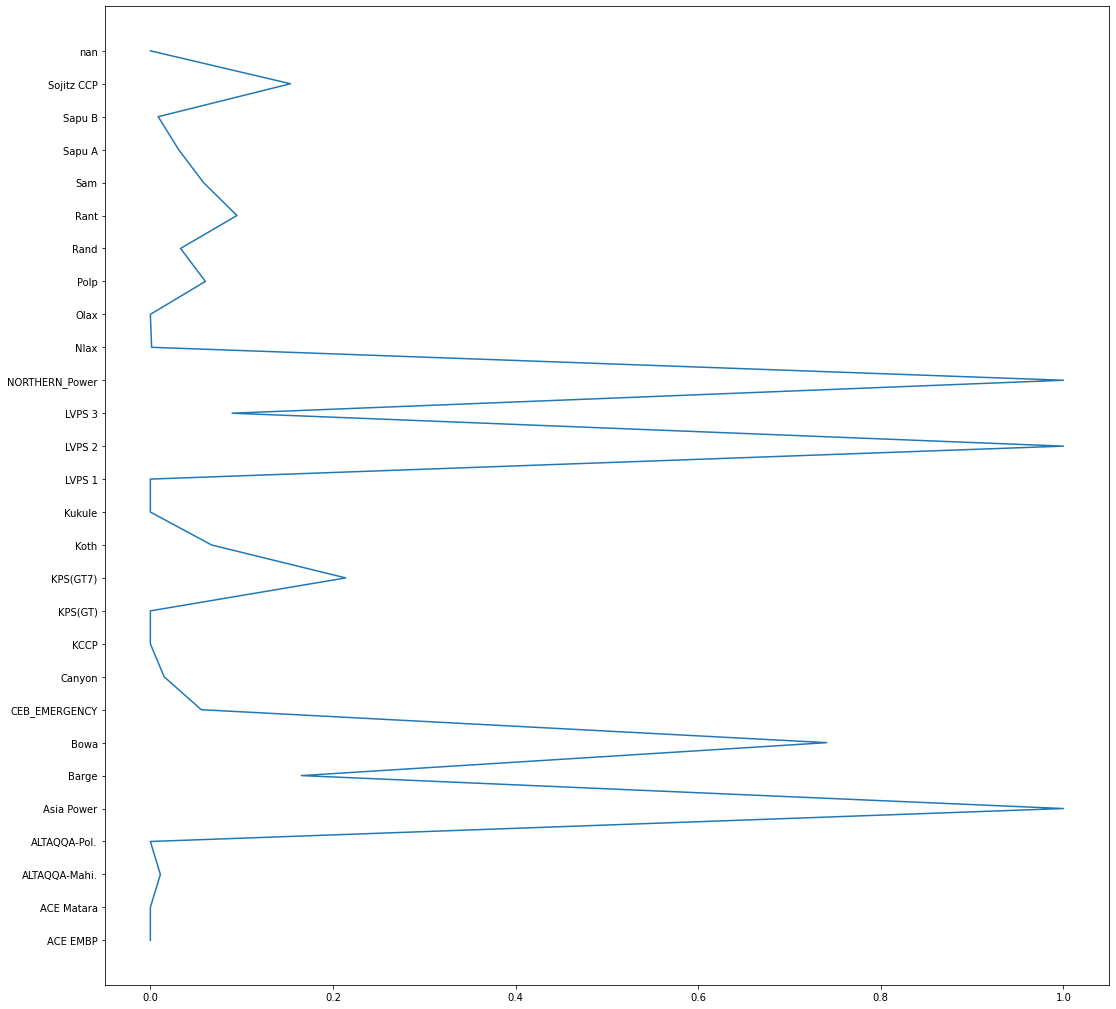

In [87]:
fig = plt.figure(figsize=(18, 18))
plt.plot(x, y)
plt.show()